In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mvt = pd.read_csv('mvtWeek1.csv',parse_dates=['Date'])

mvt.head()

D:\Program Files\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,41.756284,-87.621645
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,41.837568,-87.621761


# Problem 1

In [3]:
#1.1
mvt.shape

(191641, 11)

In [6]:
mvt.describe()

,ID,Beat,Year,Latitude,Longitude
count,1.916410e+05,191641.000000,191641.000000,189365.000000,189365.000000
mean,4.968629e+06,1258.810771,2006.134940,41.844555,-87.677782
std,2.342997e+06,702.530465,3.520285,0.085583,0.057333
min,1.310022e+06,111.000000,2001.000000,41.644710,-87.925510
25%,2.832144e+06,722.000000,2003.000000,41.771618,-87.718474
50%,4.762956e+06,1121.000000,2006.000000,41.850029,-87.677597
75%,7.201878e+06,1733.000000,2009.000000,41.917116,-87.635513
max,9.181151e+06,2535.000000,2012.000000,42.022878,-87.524676


In [7]:
#1.3
mvt['ID'].max()

9181151

In [8]:
#1.5
mvt['Arrest'].value_counts()

False    176105
True      15536
Name: Arrest, dtype: int64

In [9]:
#1.6
mvt['LocationDescription'].value_counts()[:6]

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

# Problem 2

In [10]:
#2.2
mvt['dDate'] = mvt['Date']-mvt['Date'].min()
print(mvt['dDate'].median()+mvt['Date'].min())

2006-05-21 12:30:00


In [11]:
#2.3
mvt['Month'] = mvt['Date'].dt.month
mvt['Weekday'] = mvt['Date'].dt.dayofweek

#mvt.head()

In [12]:
mvt['Month'].value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Month, dtype: int64

In [13]:
#2.4
mvt['Weekday'].value_counts()

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
Name: Weekday, dtype: int64

In [14]:
#2.5
mvt.loc[mvt['Arrest']==True,'Month'].value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Month, dtype: int64

# Problem 3

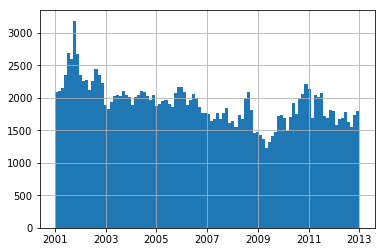

In [15]:
#3.1
mvt['Date'].hist(bins=100)


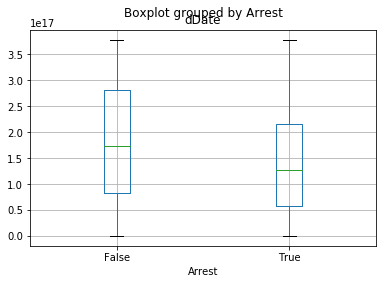

In [16]:
#3.2
mvt.boxplot(column='dDate',by='Arrest')

In [17]:
mvt.loc[mvt['Date'].dt.year==2001,'Arrest'].value_counts(normalize=True)

False    0.895883
True     0.104117
Name: Arrest, dtype: float64

In [18]:
mvt.loc[mvt['Date'].dt.year==2007,'Arrest'].value_counts(normalize=True)

False    0.915126
True     0.084874
Name: Arrest, dtype: float64

In [19]:
mvt.loc[mvt['Date'].dt.year==2012,'Arrest'].value_counts(normalize=True)

False    0.960971
True     0.039029
Name: Arrest, dtype: float64

In [20]:
#3.3-3.5
pd.crosstab(mvt['Date'].dt.year, columns=mvt['Arrest'],normalize='index')

Arrest,False,True
Date,,
2001,0.895883,0.104117
2002,0.887218,0.112782
2003,0.892057,0.107943
2004,0.899597,0.100403
2005,0.907304,0.092696
2006,0.919120,0.080880
2007,0.915126,0.084874
2008,0.929387,0.070613
2009,0.930961,0.069039


# Problem 4

In [21]:
mvt['LocationDescription'].value_counts()[:6]

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [22]:
t5 = ['STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'GAS STATION', 'DRIVEWAY - RESIDENTIAL' ]

top5 = mvt[mvt['LocationDescription'].isin(t5)].copy()
top5.shape

(177510, 14)

In [23]:
#top5.loc[top5['Arrest']==True,'LocationDescription'].value_counts()
pd.crosstab(top5['LocationDescription'], columns=top5['Arrest'],normalize='index')

Arrest,False,True
LocationDescription,,
ALLEY,0.892114,0.107886
DRIVEWAY - RESIDENTIAL,0.921194,0.078806
GAS STATION,0.792042,0.207958
PARKING LOT/GARAGE(NON.RESID.),0.892068,0.107932
STREET,0.925941,0.074059


In [24]:
top5.loc[top5['LocationDescription']=='GAS STATION','Weekday'].value_counts()

5    338
6    336
4    332
3    282
0    280
2    273
1    270
Name: Weekday, dtype: int64

In [25]:
top5.loc[top5['LocationDescription']=='DRIVEWAY - RESIDENTIAL','Weekday'].value_counts()

3    263
4    257
0    255
1    243
2    234
6    221
5    202
Name: Weekday, dtype: int64

In [27]:
#mvt1 = pd.read_csv('mvtWeek1.csv')
#mvt1.tail(30)